# Localizacion de robot con EKF y balizas
Se dispone de un escenario donde se han desplegado en posiciones conocidas balizas estáticas que miden su distancia a un robot aéreo en dicho escenario. Se trata de desarrollar técnicas de estimación de posición 3D para un robot aéreo basados en filtro de Kalman extendido (EKF) que integra las medidas tomadas por las balizas. Plataforma de desarrollo: Matlab/ROS Lenguaje: Matlab o para ROS, C/C++ o Python

Steps:
1. Se dispone a realizar a interpretare el problema de triangulacion y trialateracion
1. Se dispone realizar 1 filtro de kalman 
1. se dispone de realizar el filtro de kalman extendido

Explicando las ecuaciones y todo al respecto

https://docs.ufpr.br/~danielsantos/ProbabilisticRobotics.pdf pagina 48

## Deteminacion de posicion utilizando balizas
obtener la posicion de un objeto de interes a partir de las distancias a posiciones de localizacion conocidadas. La localizacion basandose en la medicion de distancias a ciertos puntos de referencia de localizacion conocida (balizas ), para la localizacion de un objeto movil
<!--- [comment](http://platea.pntic.mec.es/rrodrigu/docs/MEMORIA_TRILATERACION_MEDIANTE_BIDETERMINANTE_CAYLEY_MENGER.pdf) -->

Para resolver el problema de localizacion  basta con resolver el sigiente sistema de ecuaciones que reporesental la solucion a la interseccion de las 3 esfereas definidas mediante sus centros en las posiciones de referencias y sus raidos como las distancias medidas al abjeto de interes.


$$\begin{matrix}
r_{2}^2 = (x_{1}-x_2)^2+ (y_{1}-y_2)^2 +(z_{1}-z_2)^2 \\
r_{3}^2 = (x_{1}-x_3)^2+ (y_{1}-y_3)^2 +(z_{1}-z_3)^2\\
r_{4}^2 = (x_{1}-x_4)^2+ (y_{1}-y_4)^2 +(z_{1}-z_4)^2
\end{matrix} $$


Dado que dicho sistema de escuaciones no es lineal, su solucion popuede resolver mediante metodos algebraicos, numericos como trilareacion o triangulacion, asi como mediante la linealizacion del sistema de ecuaciones como se realizara al realizar el filtro de kalman extendido.


In [20]:
from Beacon_EKF import Beacons_EKF
from Beacon_sim import Beacon_sim
import numpy as np

dt=0.2
EKF = Beacons_EKF(step_time=dt,init_position=[3.0,2.2,0.0],init_speed=[1,1.5,1.5],q=0.2,r=1.2)
beacon = Beacon_sim(pos=[3.0,2.2,0.0],vel=[1,1.50,1.5],dt=dt)
EKF.get_beacon_point()


[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [0.0, 10.0, 0.0]]

In [21]:
xs, track_pos,br= [], [],[]
xs1 ,xs2, xs3 = [],[],[]
br1 ,br2, br3 = [],[],[]
track_posx,track_posy, track_posz=[],[],[]
for i in range (int(30/dt)):
    z = beacon.update_position()
    track_pos.append(beacon.get_pos().copy())
    br.append(z.copy())
    EKF.update(z=z)
    xs.append(EKF.get_status())
    EKF.predict()
    
time = np.arange(0, len(xs)*dt, dt)

for i in range(len(xs)):
    xs1.append(xs[i][0][0]) # valor de posicion x
    xs2.append(xs[i][1][0]) # valor de posicion y
    xs3.append(xs[i][2][0]) # valor de posicion z
    track_posx.append(track_pos[i][0])
    track_posy.append(track_pos[i][1])
    track_posz.append(track_pos[i][2])
    br1.append(br[i][0][0])
    br2.append(br[i][1][0])
    br3.append(br[i][2][0])
    #print(str(track_posx[i])+"--"+str(xs1[i]))
print(br1[-1])

71.78500827498122


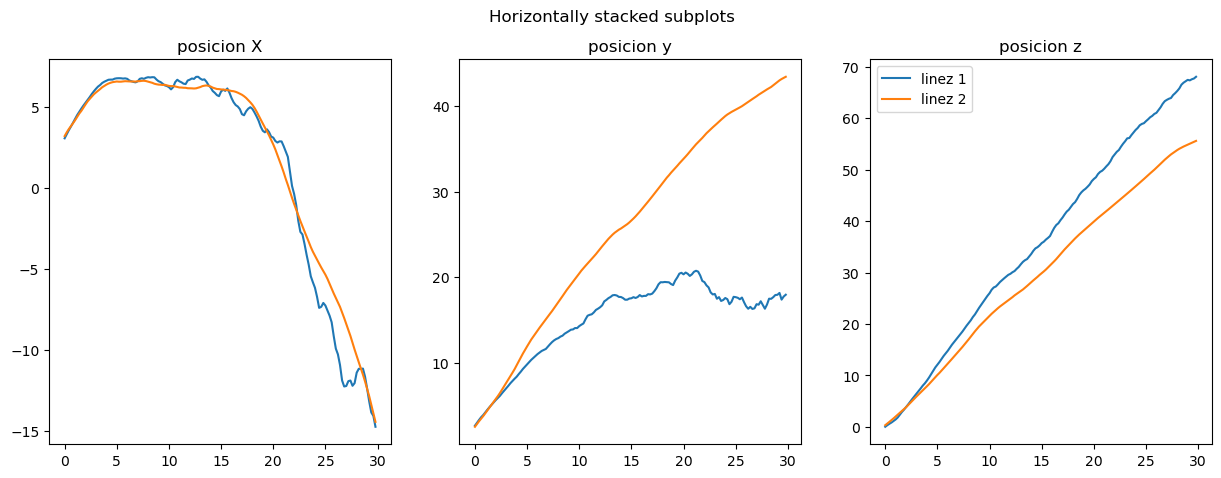

In [22]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(time, xs1,  label = "linex 1")
ax1.plot(time, track_posx, label = "linex 2")
ax1.set_title('posicion X')
ax2.plot(time, xs2,  label = "liney 1")
ax2.plot(time, track_posy, label = "liney 2")
ax2.set_title('posicion y')
ax3.plot(time, xs3,  label = "linez 1")
ax3.plot(time, track_posz, label = "linez 2")
ax3.set_title('posicion z')
#plt.plot(time, xs1,  label = "line 1")
#plt.plot(time, track_posx, label = "line 2")
plt.legend()
plt.show()

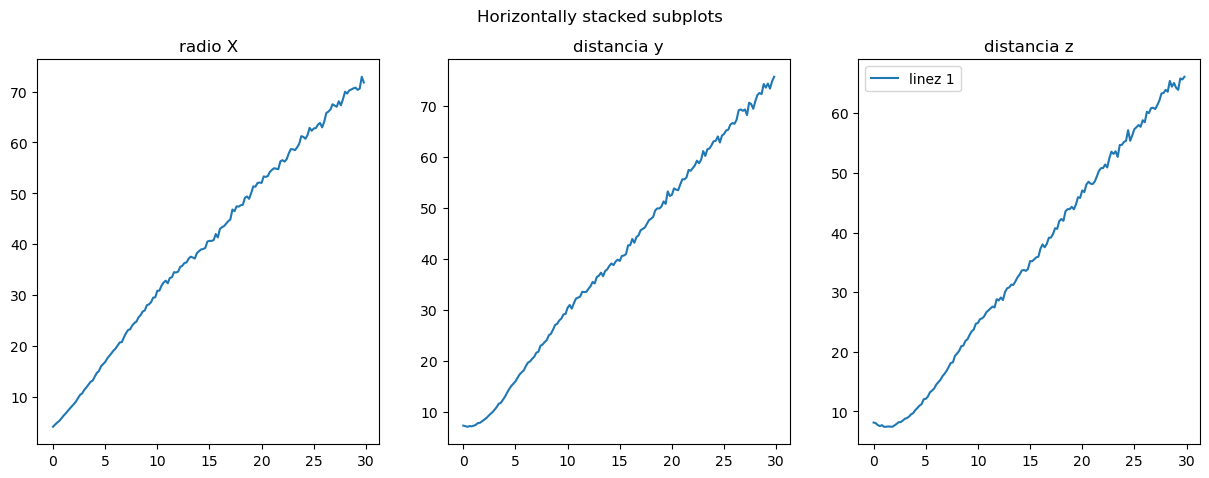

In [23]:


fig2, (ax11, ax21,ax31) = plt.subplots(1, 3,figsize=(15,5))
fig2.suptitle('Horizontally stacked subplots')
ax11.plot(time, br1,  label = "linex 1")
ax11.set_title('radio X')
ax21.plot(time, br2,  label = "liney 1")
ax21.set_title('distancia y')
ax31.plot(time, br3,  label = "linez 1")
ax31.set_title('distancia z')
#plt.plot(time, xs1,  label = "line 1")
#plt.plot(time, track_posx, label = "line 2")
plt.legend()
plt.show()

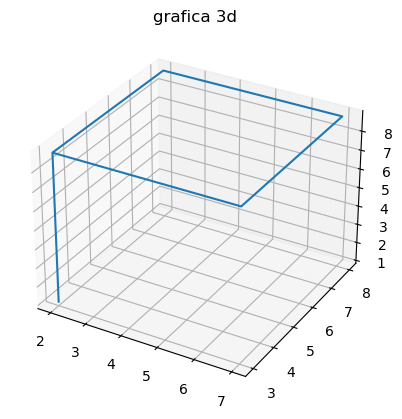

In [48]:
trayec_x =[]
trayec_y =[]
trayec_z =[]
init_pos = [2,3,1.0]

for i in range(0,80,1):
    trayec_x.append(init_pos[0])
    trayec_y.append(init_pos[1])
    trayec_z.append(init_pos[2]+i*0.1)
    
for i in range(0,50,1):
    trayec_x.append(trayec_x[-1])
    trayec_y.append(trayec_y[-1]+0.1)
    trayec_z.append(trayec_z[-1])
    
for i in range(0,50,1):
    trayec_x.append(trayec_x[-1]+0.1)
    trayec_y.append(trayec_y[-1])
    trayec_z.append(trayec_z[-1])
    
for i in range(0,50,1):
    trayec_x.append(trayec_x[-1])
    trayec_y.append(trayec_y[-1]-0.1)
    trayec_z.append(trayec_z[-1])
for i in range(0,50,1):
    trayec_x.append(trayec_x[-1]-0.1)
    trayec_y.append(trayec_y[-1])
    trayec_z.append(trayec_z[-1])
    
ax111 = plt.axes(projection = "3d")
ax111.plot_wireframe(np.array([trayec_x]),np.array([trayec_y]),np.array([trayec_z]))
plt.title("grafica 3d")

trayec = []
trayec.append(trayec_x)
trayec.append(trayec_y)
trayec.append(trayec_z)

plt.show()



In [53]:
init_pos = [2,3,1.0]
EKF1 = Beacons_EKF(step_time=dt,init_position=init_pos,init_speed=[0.0,0.0,1.0],q=0.92,r= 0.25)
beacon1 = Beacon_sim(pos=init_pos,vel=[0,0.0,1.0],dt=dt)
beacon1.set_trayec(trayec)
beacon_base=EKF1.get_beacon_point()
print(beacon_base)
xs, track_pos,br= [], [],[]
xs1 ,xs2, xs3 = [],[],[]
br1 ,br2, br3 = [],[],[]
track_posx,track_posy, track_posz=[],[],[]
for i in range(len(trayec[0]) -1):
    z = beacon1.update_position()
    track_pos.append(beacon1.get_pos().copy())
    br.append(z.copy())
    EKF1.update(z=z)
    xs.append(EKF1.get_status())
    EKF1.predict()
    print(xs[-1])
    print(xs[-1][2][0])
    
time = np.arange(0, len(xs)*dt, dt)

for i in range(len(xs)):
    xs1.append(xs[i][0][0]) # valor de posicion x
    xs2.append(xs[i][1][0]) # valor de posicion y
    xs3.append(xs[i][2][0]) # valor de posicion z
    track_posx.append(track_pos[i][0])
    track_posy.append(track_pos[i][1])
    track_posz.append(track_pos[i][2])
    br1.append(br[i][0][0])
    br2.append(br[i][1][0])
    br3.append(br[i][2][0])

[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [0.0, 10.0, 0.0]]
[[ 1.94032242]
 [ 2.69426825]
 [ 2.11287355]
 [-0.49618441]
 [ 1.18979104]
 [ 0.59769658]]
2.1128735466097934
[[ 1.85818009]
 [ 2.72272917]
 [ 2.00797457]
 [-0.58221652]
 [ 2.49396949]
 [-0.57981899]]
2.007974567915112
[[ 1.95459354]
 [ 2.79766025]
 [ 1.89110751]
 [-0.36408399]
 [ 3.20058032]
 [-1.70170515]]
1.8911075056606823
[[ 1.92451824]
 [ 2.9089488 ]
 [ 1.8150077 ]
 [-0.61342795]
 [ 3.60273094]
 [-2.28497421]]
1.815007695854137
[[ 1.92408929]
 [ 2.93046583]
 [ 2.0534088 ]
 [-0.40502467]
 [ 4.02356971]
 [-2.7410401 ]]
2.053408799408582
[[ 1.96544722]
 [ 2.87456993]
 [ 2.12288442]
 [-0.30945339]
 [ 3.89834239]
 [-2.97901035]]
2.1228844174216874
[[ 1.99663308]
 [ 3.03387944]
 [ 1.89016542]
 [-0.23778416]
 [ 4.34933314]
 [-3.5433412 ]]
1.8901654155303995
[[ 2.17292598]
 [ 3.04535356]
 [ 2.08307107]
 [ 0.19148402]
 [ 4.30981114]
 [-3.60665442]]
2.0830710672368933
[[ 2.10239919]
 [ 3.05939916]
 [ 2.03913999]
 [-0.38698599]
 [ 3.9402

[[ 1.94966381]
 [ 3.03345162]
 [ 8.91870837]
 [-0.29607014]
 [ 4.39802411]
 [-0.70338557]]
8.918708373338022
[[ 2.11820844]
 [ 2.93227543]
 [ 9.06418581]
 [ 0.12755129]
 [ 4.15370436]
 [-0.93322091]]
9.064185813131752
[[ 2.05999201]
 [ 3.02558144]
 [ 8.96241043]
 [-0.33130515]
 [ 3.90304642]
 [-1.10096511]]
8.962410430552252
[[ 1.79706135]
 [ 3.32320833]
 [ 9.0138146 ]
 [-0.78849717]
 [ 4.98589176]
 [-1.10197742]]
9.013814600555234
[[ 1.82421013]
 [ 3.26134604]
 [ 9.03727793]
 [-0.45862935]
 [ 5.48978809]
 [-2.32915463]]
9.03727792715329
[[ 1.87586961]
 [ 3.32370949]
 [ 8.93199575]
 [-0.54225907]
 [ 5.65743329]
 [-2.27489923]]
8.931995749239748
[[ 1.9887113 ]
 [ 3.47701593]
 [ 8.92535148]
 [-0.24306475]
 [ 6.15890506]
 [-2.31318467]]
8.92535148446754
[[ 2.1053246 ]
 [ 3.66603219]
 [ 8.94987926]
 [-0.29044789]
 [ 6.38546769]
 [-2.29008475]]
8.949879263519007
[[ 2.12594481]
 [ 3.63100658]
 [ 8.93906507]
 [-0.30577982]
 [ 6.29542559]
 [-2.57579049]]
8.939065074123452
[[ 2.07859226]
 [ 3.8

[[ 4.13781926]
 [ 7.82563574]
 [ 9.66879183]
 [-2.43303967]
 [12.9477071 ]
 [-8.31811508]]
9.668791826994605
[[ 4.31842112]
 [ 7.83560117]
 [ 9.62212691]
 [-2.10199143]
 [12.85966813]
 [-8.83914597]]
9.622126910148934
[[ 4.60841419]
 [ 7.89134516]
 [ 9.47279131]
 [-1.80538714]
 [12.50329294]
 [-8.8145833 ]]
9.472791314255712
[[ 4.97663224]
 [ 8.14688135]
 [ 9.29784778]
 [-1.27769992]
 [12.58622298]
 [-8.57489219]]
9.297847784973927
[[ 5.27760554]
 [ 8.08132269]
 [ 9.39372967]
 [-1.08767812]
 [11.58475715]
 [-8.10427521]]
9.39372967199958
[[ 5.21734049]
 [ 8.21715804]
 [ 9.19525345]
 [-1.45616738]
 [11.48158313]
 [-7.78165514]]
9.195253452400705
[[ 5.58656518]
 [ 8.24149346]
 [ 9.29929816]
 [-0.78725804]
 [11.11364753]
 [-7.85856998]]
9.299298161227814
[[ 5.7260171 ]
 [ 8.14912364]
 [ 9.12522809]
 [-1.17677541]
 [ 9.91362988]
 [-7.47418153]]
9.125228093667378
[[ 5.55483711]
 [ 8.05881392]
 [ 9.13071979]
 [-1.37406829]
 [ 9.64687847]
 [-6.96586111]]
9.130719786591198
[[ 5.51523222]
 [ 8.

[[  6.5174305 ]
 [  3.20669366]
 [  9.2728693 ]
 [  1.88948523]
 [-14.88117382]
 [  8.1513053 ]]
9.272869300107653
[[  6.14883287]
 [  3.28135044]
 [  9.32445695]
 [  1.03515431]
 [-14.8012911 ]
 [  8.61727894]]
9.324456953523995
[[  6.06375386]
 [  3.26954808]
 [  9.37566115]
 [  1.32130645]
 [-13.75835716]
 [  8.16981547]]
9.37566115258526
[[  6.09532194]
 [  3.51351212]
 [  9.39343538]
 [  1.13519078]
 [-13.01243863]
 [  8.07899004]]
9.393435379559103
[[  6.03920508]
 [  3.42275329]
 [  9.3359323 ]
 [  1.08263341]
 [-12.65865576]
 [  7.50644296]]
9.33593229840218
[[  5.81030782]
 [  3.61886753]
 [  9.32634814]
 [  0.5431255 ]
 [-11.81694807]
 [  7.27085304]]
9.32634813862436
[[  5.70545231]
 [  3.36425264]
 [  9.19178227]
 [  0.59837341]
 [-11.47291185]
 [  6.28739614]]
9.191782273734756
[[  5.45076869]
 [  3.31955329]
 [  9.18485612]
 [  0.17989463]
 [-11.18405452]
 [  6.32119661]]
9.18485612496774
[[  5.52649561]
 [  3.03325946]
 [  9.03813182]
 [  0.87477847]
 [-11.11144222]
 [  

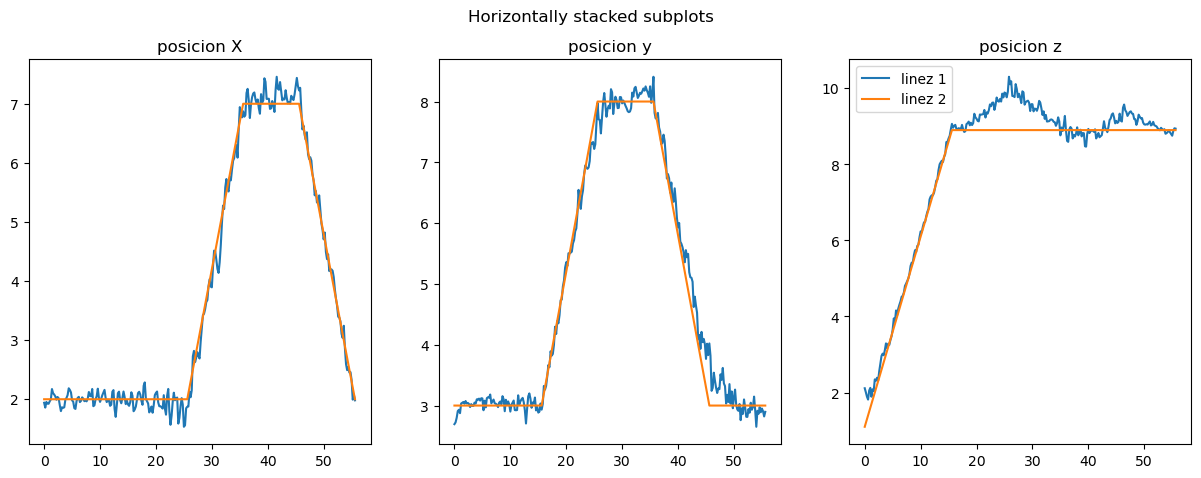

In [54]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(time, xs1)
ax1.plot(time, track_posx, label = "linex 2")
ax1.set_title('posicion X')
ax2.plot(time, xs2,  label = "liney 1")
ax2.plot(time, track_posy, label = "liney 2")
ax2.set_title('posicion y')
ax3.plot(time, xs3,  label = "linez 1")
ax3.plot(time, track_posz, label = "linez 2")
ax3.set_title('posicion z')
#plt.plot(time, xs1,  label = "line 1")
#plt.plot(time, track_posx, label = "line 2")
plt.legend()
plt.show()

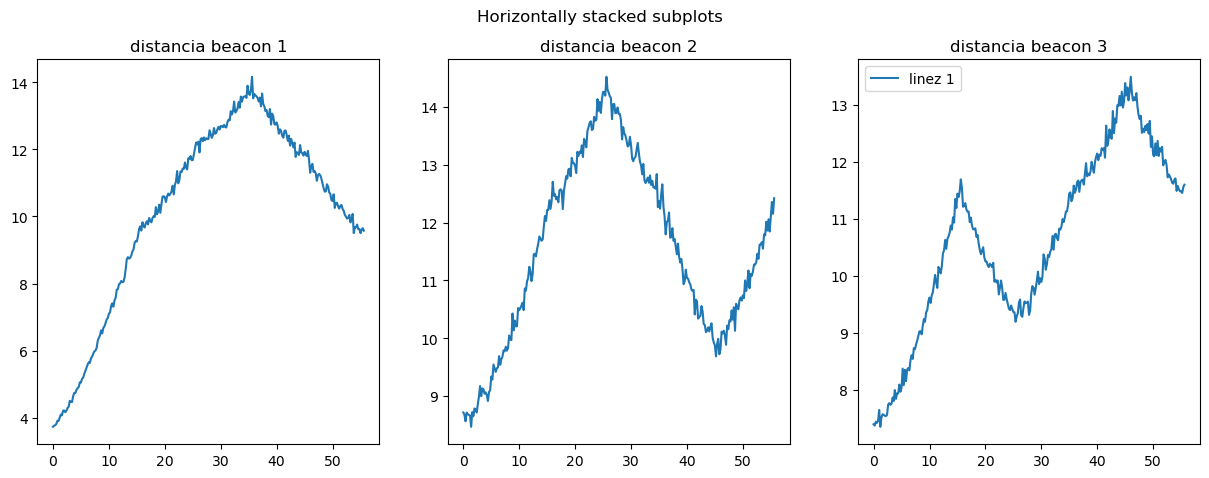

In [55]:
fig2, (ax11, ax21,ax31) = plt.subplots(1, 3,figsize=(15,5))
fig2.suptitle('Horizontally stacked subplots')
ax11.plot(time, br1,  label = "linex 1")
ax11.set_title('distancia beacon 1')
ax21.plot(time, br2,  label = "liney 1")
ax21.set_title('distancia beacon 2')
ax31.plot(time, br3,  label = "linez 1")
ax31.set_title('distancia beacon 3')
#plt.plot(time, xs1,  label = "line 1")
#plt.plot(time, track_posx, label = "line 2")
plt.legend()
plt.show()

[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [0.0, 10.0, 0.0]]


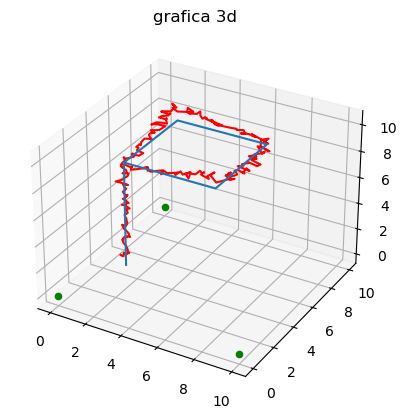

In [56]:
ax111 = plt.axes(projection = "3d")
ax111.plot_wireframe(np.array([trayec_x]),np.array([trayec_y]),np.array([trayec_z]))
ax111.plot_wireframe(np.array([xs1]),np.array([xs2]),np.array([xs3]), color="red")
ax111.scatter(beacon_base[0][0], beacon_base[0][1], beacon_base[0][2], c='g', marker='o')
ax111.scatter(beacon_base[1][0], beacon_base[1][1], beacon_base[1][2], c='g', marker='o')
ax111.scatter(beacon_base[2][0], beacon_base[2][1], beacon_base[2][2], c='g', marker='o')
plt.title("grafica 3d")
print(beacon_base)
plt.show()